# About

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
import numpy as np
import pandas as pd

In [82]:
path = r'/content/drive/MyDrive/SERTIFIKASI_DS_2023/Daily Update Data Agregat Covid-19 Jakarta - Data Jakarta.csv'

In [83]:
df = pd.read_csv(path, delimiter=',')
df

,Tanggal,Jam,Tanggal Jam,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
0,01/03/2020,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,02/03/2020,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,03/03/2020,NaN,NaN,1,0,0,2,3,3,2,0,NaN,NaN,NaN
3,04/03/2020,NaN,NaN,1,0,0,2,3,0,2,0,NaN,NaN,NaN
4,05/03/2020,NaN,NaN,3,0,0,4,7,4,4,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,26/06/2023,NaN,NaN,16115,1551828,124,67,1568134,10,191,25,0.0,2.0,189.0
1213,27/06/2023,NaN,NaN,16115,1551845,126,67,1568153,19,193,17,0.0,10.0,183.0
1214,28/06/2023,NaN,NaN,16115,1551857,129,63,1568164,11,192,12,0.0,10.0,182.0
1215,29/06/2023,NaN,NaN,16115,1551896,117,44,1568172,8,161,39,0.0,8.0,153.0


# Explanatory Data Analysis

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tanggal          1217 non-null   object 
 1   Jam              0 non-null      float64
 2   Tanggal Jam      0 non-null      float64
 3   Meninggal        1217 non-null   int64  
 4   Sembuh           1217 non-null   int64  
 5   Self Isolation   1217 non-null   int64  
 6   Masih Perawatan  1217 non-null   int64  
 7   Total Pasien     1217 non-null   int64  
 8   Positif Harian   1217 non-null   int64  
 9   Positif Aktif    1217 non-null   int64  
 10  Sembuh Harian    1217 non-null   int64  
 11  Tanpa Gejala     1077 non-null   float64
 12  Bergejala        1077 non-null   float64
 13  Belum Ada Data   1077 non-null   float64
dtypes: float64(5), int64(8), object(1)
memory usage: 133.2+ KB


Berdasarkan df.info():

1. Diketahui bahwa hampir seluruh kolom merupakan bentuk numerikal
2. Hanya kolom 'Tanggal' yang merupakan bentuk kategori

In [85]:
df.isnull().sum()

Tanggal               0
Jam                1217
Tanggal Jam        1217
Meninggal             0
Sembuh                0
Self Isolation        0
Masih Perawatan       0
Total Pasien          0
Positif Harian        0
Positif Aktif         0
Sembuh Harian         0
Tanpa Gejala        140
Bergejala           140
Belum Ada Data      140
dtype: int64

Terdapat data null pada beberapa kolom berikut.

1. Jam
2. Tanggal
3. Tanpa Gejala
4. Bergejala
5. Belum Ada Data

Karena kolom "Jam" dan "Tanggal Jam" tidak digunakan, drop kolom tersebut.

In [86]:
drop_kolom_null = ["Jam", "Tanggal Jam"]

df = df.drop(drop_kolom_null, axis=1)
df.sample()

,Tanggal,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
354,18/02/2021,5044,302451,7067,6549,321111,373,13616,2656,3272.0,10070.0,274.0


Drop kolom "Tanggal" karena tidak digunakan juga

In [87]:
drop_tanggal = ["Tanggal"]

df = df.drop(drop_tanggal, axis=1)
df.sample()

,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
1059,15940,1522374,542,151,1539007,62,693,86,0.0,2.0,691.0


Untuk tiga kolom null lainnya, cek seberapa besar persentase data tersebut pada keseluruhan dataset.

In [88]:
# Karena jumlah null ketiga kolom sama
# Maka cukup gunakan sample dari salah satu kolom
sample_null = df["Tanpa Gejala"].isnull().sum()
persentase = (sample_null / len(df.index)) * 100
print(f"Persentase data null: {persentase:.2f}%")

Persentase data null: 11.50%


Karena persentase data null lebih besar daripada 5%, jangan lakukan drop untuk menghindari terjadinya kehilangan data. Cek distribusi ketiga kolom tersebut.

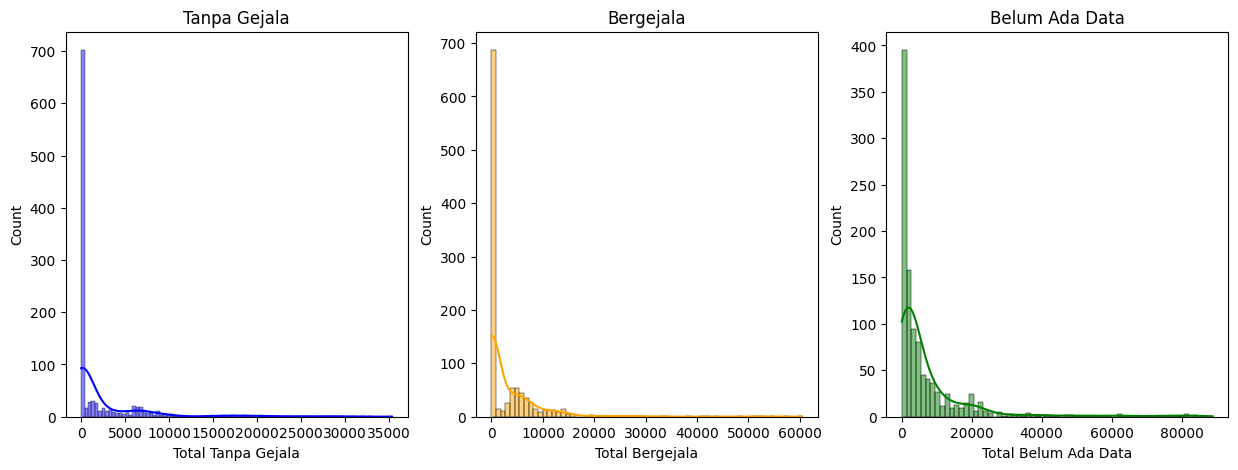

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tanpa gejala, bergejala, belum ada data
tg, br, bad = df["Tanpa Gejala"], df["Bergejala"], df["Belum Ada Data"]

# Buat single plot untuk ketiga grafik
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Buat plos masing-masing histogram
sns.histplot(tg, ax=axes[0], kde=True, color='blue')
sns.histplot(br, ax=axes[1], kde=True, color='orange')
sns.histplot(bad, ax=axes[2], kde=True, color='green')

# Tulis judul masing-masing histogram
axes[0].set_title('Tanpa Gejala')
axes[0].set_xlabel('Total Tanpa Gejala')

axes[1].set_title('Bergejala')
axes[1].set_xlabel('Total Bergejala')

axes[2].set_title('Belum Ada Data')
axes[2].set_xlabel('Total Belum Ada Data')

# Tampilkan plot
plt.show()

Berdasarkan ketiga grafik di atas, persebaran data nullnya terlihat sangat jomplang. Data jomplang tersebut bernilai 0. Untuk itu, kita dapat mengisi data null lainnya dengan nilai 0

In [90]:
# Kolom kosong yang datanya akan diisi dengan nilai 0
fill_null = {
    'Tanpa Gejala': 0,
    'Bergejala': 0,
    'Belum Ada Data': 0,
}

# Eksekusi
df.fillna(value=fill_null, inplace=True)

In [91]:
df.isnull().sum()

Meninggal          0
Sembuh             0
Self Isolation     0
Masih Perawatan    0
Total Pasien       0
Positif Harian     0
Positif Aktif      0
Sembuh Harian      0
Tanpa Gejala       0
Bergejala          0
Belum Ada Data     0
dtype: int64

Bisa terlihat bahwa tidak ada data null lagi pada dataset

In [92]:
df.duplicated().sum()

3

Terdapat 3 data duplikat. Lakukan drop saja karena besar data tersebut cukup kecil

In [93]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Setelah drop data duplikat, lakukan pengecekan kembali dan tidak ada lagi data yang duplikat. Simpan df ke dalam bentuk baru untuk menghindari running ulang code dari awal jika ada error

In [94]:
df2 = df.copy()
df2.sample()

,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
545,13242,828125,5607,2395,849369,468,8002,451,0.0,0.0,8002.0


## Soal Nomor 1

Dari dataset yang disediakan, temukan nilai mean, median, dan modus dari positif COVID-19 harian Jakarta.

In [95]:
pos_cov_harian = df2["Positif Harian"]

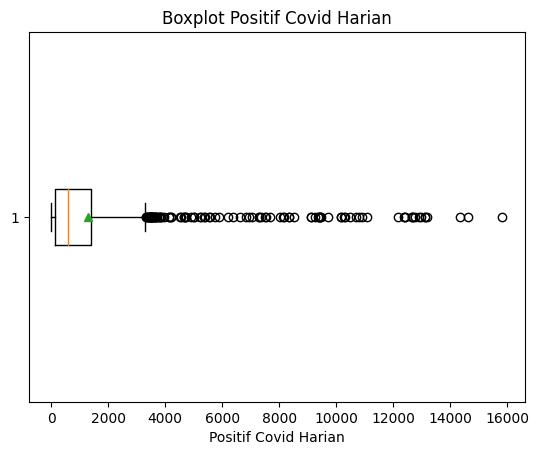

In [96]:
import matplotlib.pyplot as plt

plt.boxplot(pos_cov_harian, vert=False, showmeans=True)
plt.xlabel('Positif Covid Harian')
# plt.ylabel('')
plt.title('Boxplot Positif Covid Harian')
plt.show()

Berdasarkan boxplot, didapatkan informasi berikut:
1. Terdapat banyak sekali outliers. Data ini bisa dikatakan anomali atau lonjakan data. Jika melihat dataset secara langsung, kemungkinan ini adalah tingginya lonjakan covid harian di Jakarta.
2. Penunjuk hijau atau nilai mean masih berada di dalam IQR atau interquartile range.

In [97]:
mean = pd.Series.sum(pos_cov_harian) / len(pos_cov_harian)
median = pd.Series.median(pos_cov_harian)
modus = pd.Series.mode(pos_cov_harian)

print(f"Nilai mean: {mean:.2f}")
print(f"Nilai median: {median:.2f}")
if len(modus) == 1:
    print(f"{modus}")
else:
    for n, m in enumerate(modus, 1):
        print(f"Nilai modus ke-{n}: {m}")

Nilai mean: 1291.85
Nilai median: 601.00
Nilai modus ke-1: 70
Nilai modus ke-2: 131


## Soal Nomor 2

Dari dataset yang disediakan, temukan nilai minimal dan maksimal dari positif COVID-19 harian Jakarta.

In [98]:
cov_min = pd.Series.min(pos_cov_harian)
cov_max = pd.Series.max(pos_cov_harian)

print(f"Nilai minimal positif COVID-19 harian Jakarta: {cov_min}")
print(f"Nilai maksimal positif COVID-19 harian Jakarta: {cov_max}")

Nilai minimal positif COVID-19 harian Jakarta: 0
Nilai maksimal positif COVID-19 harian Jakarta: 15825


## Soal Nomor 3

Dari dataset yang disediakan, usulkan 5 (lima) buah variabel dan berikan analisis korelasi antara kelima variabel tersebut. Jelaskan apa kesimpulan yang dapat diambil berdasarkan analisis Anda!

In [99]:
korelasi = df.corr(numeric_only=True)
korelasi

,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
Meninggal,1.000000,0.965629,0.047349,-0.180155,0.967878,0.024386,-0.007661,0.054693,-0.419937,-0.312220,0.232389
Sembuh,0.965629,1.000000,-0.015457,-0.264912,0.999551,-0.052829,-0.077793,-0.010329,-0.424575,-0.355669,0.168859
Self Isolation,0.047349,-0.015457,1.000000,0.843263,0.014146,0.927472,0.991073,0.840545,0.411652,0.607350,0.859522
Masih Perawatan,-0.180155,-0.264912,0.843263,1.000000,-0.238070,0.869229,0.907394,0.722894,0.495494,0.764543,0.653287
Total Pasien,0.967878,0.999551,0.014146,-0.238070,1.000000,-0.024625,-0.047987,0.014791,-0.412451,-0.336560,0.194285
Positif Harian,0.024386,-0.052829,0.927472,0.869229,-0.024625,1.000000,0.940803,0.797493,0.334508,0.550146,0.850177
Positif Aktif,-0.007661,-0.077793,0.991073,0.907394,-0.047987,0.940803,1.000000,0.836537,0.444776,0.664529,0.834111
Sembuh Harian,0.054693,-0.010329,0.840545,0.722894,0.014791,0.797493,0.836537,1.000000,0.290569,0.470189,0.763337
Tanpa Gejala,-0.419937,-0.424575,0.411652,0.495494,-0.412451,0.334508,0.444776,0.290569,1.000000,0.802832,0.096981
Bergejala,-0.312220,-0.355669,0.607350,0.764543,-0.336560,0.550146,0.664529,0.470189,0.802832,1.000000,0.186600


Walaupun hasilnya terlihat, cukup sulit untuk membaca data di atas secara cepat. Untuk itu, gunakan heatmap dalam membaca data.

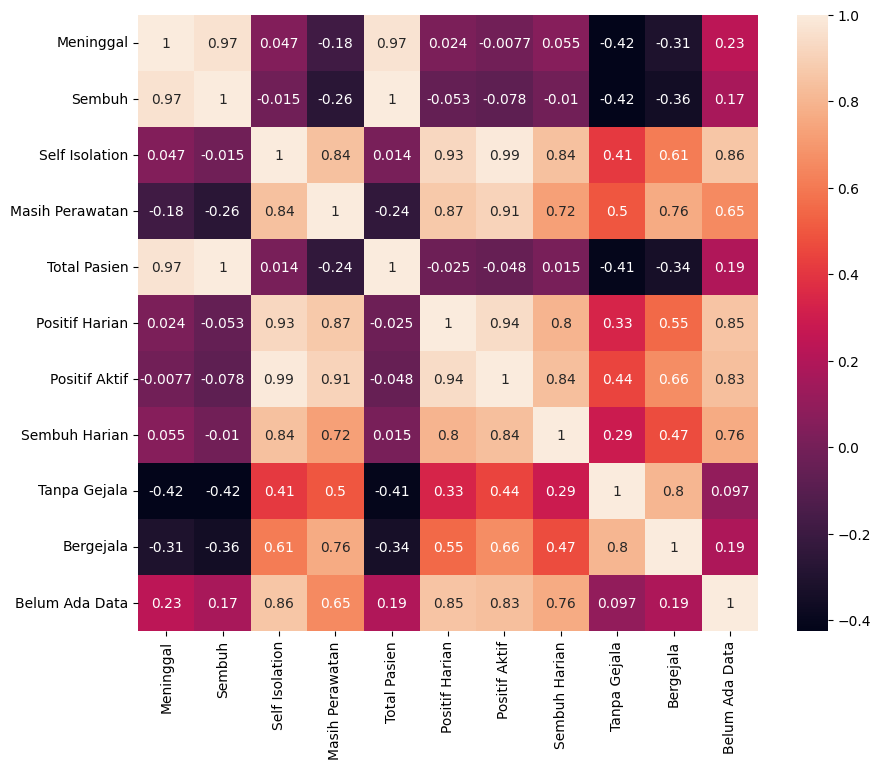

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(korelasi, annot=True)
plt.show()

Berdasarkan grafik di atas, pada kolom "Positif Harian" beberapa bagian berwarna cukup terang. Sesuai dengan keterangan yang ada pada bagian grafik sebelah kanan, maka dapat dikatakan bahwa kolom "Positif Harian" berkorelasi dengan beberapa kolom. Kita akan menggunakan kolom tersebut

In [101]:
lima_var = ["Self Isolation", "Masih Perawatan", "Sembuh Harian", "Positif Aktif", "Positif Harian"]
korelasi = df2[lima_var].corr(numeric_only=True)
korelasi

,Self Isolation,Masih Perawatan,Sembuh Harian,Positif Aktif,Positif Harian
Self Isolation,1.000000,0.843263,0.840545,0.991073,0.927472
Masih Perawatan,0.843263,1.000000,0.722894,0.907394,0.869229
Sembuh Harian,0.840545,0.722894,1.000000,0.836537,0.797493
Positif Aktif,0.991073,0.907394,0.836537,1.000000,0.940803
Positif Harian,0.927472,0.869229,0.797493,0.940803,1.000000


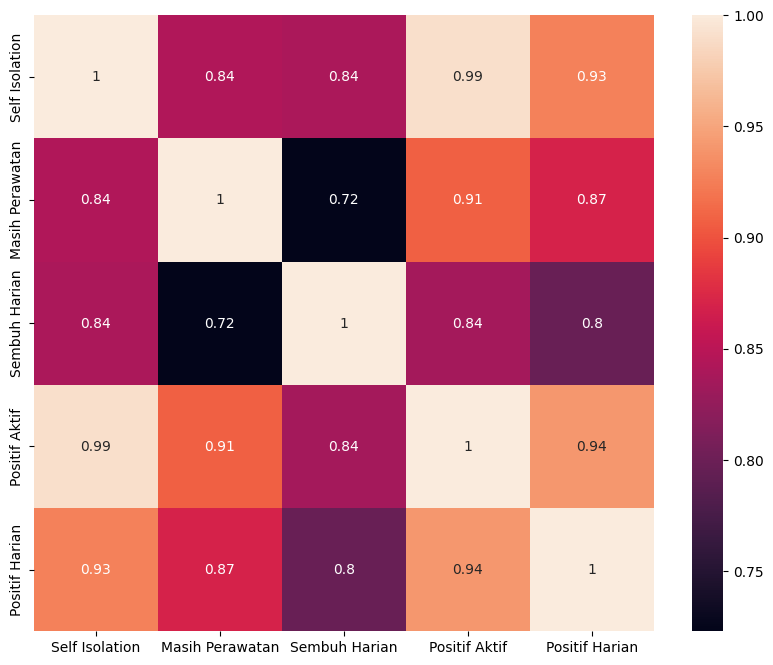

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(korelasi, annot=True)
plt.show()

Berdasarkan grafik di atas, dapat dilihat bahwa kolom "Positif Harian" saling berkorelasi dengan kolom "Self Isolation", "Masih Perawatan", "Sembuh Harian", dan "Positif Aktif"

# Preprocessing

Untuk variabel X, gunakan keempat kolom yang berkoreasi dengan "Positif Harian"

In [116]:
lima_var = ["Self Isolation", "Masih Perawatan", "Sembuh Harian", "Positif Aktif", "Positif Harian"]
korelasi = df2[lima_var]
korelasi

,Self Isolation,Masih Perawatan,Sembuh Harian,Positif Aktif,Positif Harian
0,0,0,0,0,0
2,0,2,0,2,3
3,0,2,0,2,0
4,0,4,0,4,4
5,0,4,0,4,0
...,...,...,...,...,...
1212,124,67,25,191,10
1213,126,67,17,193,19
1214,129,63,12,192,11
1215,117,44,39,161,8


In [117]:
X = korelasi.drop(columns=["Positif Harian"])
X

,Self Isolation,Masih Perawatan,Sembuh Harian,Positif Aktif
0,0,0,0,0
2,0,2,0,2
3,0,2,0,2
4,0,4,0,4
5,0,4,0,4
...,...,...,...,...
1212,124,67,25,191
1213,126,67,17,193
1214,129,63,12,192
1215,117,44,39,161


Karena "Positif Harian" adalah prediksinya, maka gunakan "Positif Harian" pada variabel y


In [118]:
y = df['Positif Harian']
y

0        0
2        3
3        0
4        4
5        0
        ..
1212    10
1213    19
1214    11
1215     8
1216    11
Name: Positif Harian, Length: 1214, dtype: int64

# Model

In [120]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
predicts = model.predict(X_test)

In [122]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
score = r2_score(y_test,y_pred)
score

0.9408553110464932

# Evaluasi

In [123]:
from sklearn import metrics

metrics_MAE = metrics.mean_absolute_error(y_test,y_pred)
metrics_MSE = metrics.mean_squared_error(y_test,y_pred)
metrics_RSME = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [124]:
print(f"MAE: {metrics_MAE}")
print(f"MSE: {metrics_MSE}")
print(f"RSME: {metrics_RSME}")

MAE: 350.6864811519116
MSE: 399007.58701805497
RSME: 631.6704734416949


In [125]:
df["Positif Harian"].mean()

1291.8509060955519

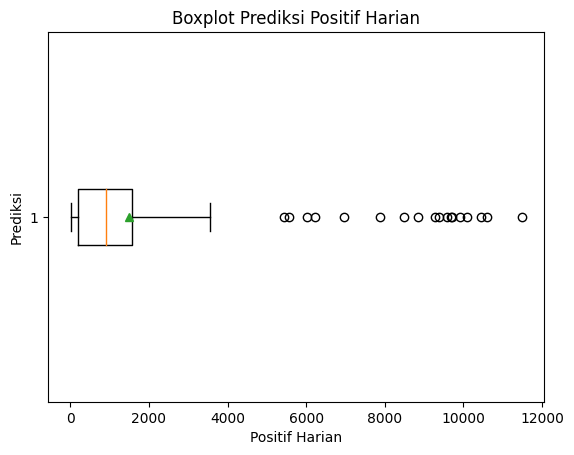

In [126]:
import matplotlib.pyplot as plt

plt.boxplot(y_pred, vert=False, showmeans=True)
plt.xlabel('Positif Harian')
plt.ylabel('Prediksi')
plt.title('Boxplot Prediksi Positif Harian')
plt.show()

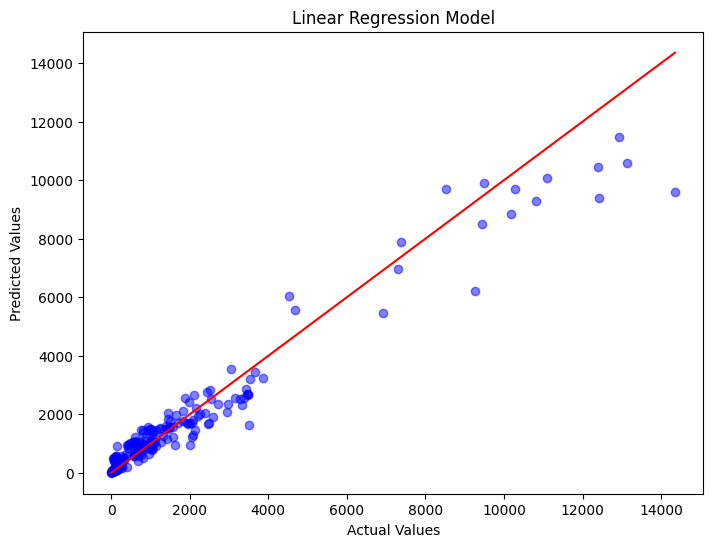

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicts, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model')
plt.show()
